In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from pydub import AudioSegment

SAVE_DIR = Path("../output")

In [2]:
amplitude = 1
freq_c = 261.626
freq_g = 391.955
sampling_rate = 44100
duration = 1

In [3]:
time = np.arange(0, duration, 1 / sampling_rate)
signal_c = amplitude * np.sin(2 * np.pi * freq_c * time)
signal_g = amplitude * np.sin(2 * np.pi * freq_g * time)
signal = signal_c + signal_g


In [4]:
def numpy_to_audio_segment(signal: np.ndarray, sampling_rate: int) -> AudioSegment:
    signal_int16 = (signal * np.iinfo(np.int16).max).astype(np.int16)
    return AudioSegment(
        signal_int16.tobytes(),
        frame_rate=sampling_rate,
        sample_width=signal_int16.dtype.itemsize,
        channels=1,
    )


audio_segment_c = numpy_to_audio_segment(signal_c, sampling_rate)
audio_segment_g = numpy_to_audio_segment(signal_g, sampling_rate)
audio_segment_cg = numpy_to_audio_segment(signal, sampling_rate)

audio_segment_c.export(SAVE_DIR / "audio_c.mp3", format="mp3")
audio_segment_g.export(SAVE_DIR / "audio_g.mp3", format="mp3")
audio_segment_cg.export(SAVE_DIR / "audio_cg.mp3", format="mp3")

<_io.BufferedRandom name='../output/audio_cg.mp3'>

In [5]:
Audio(signal_g, rate=sampling_rate)


In [6]:
Audio(signal, rate=sampling_rate)

In [7]:
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
fft_magnitude = np.abs(fft_result)


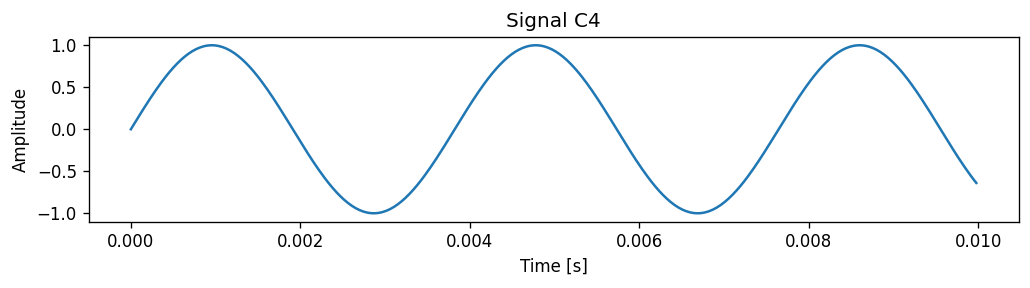

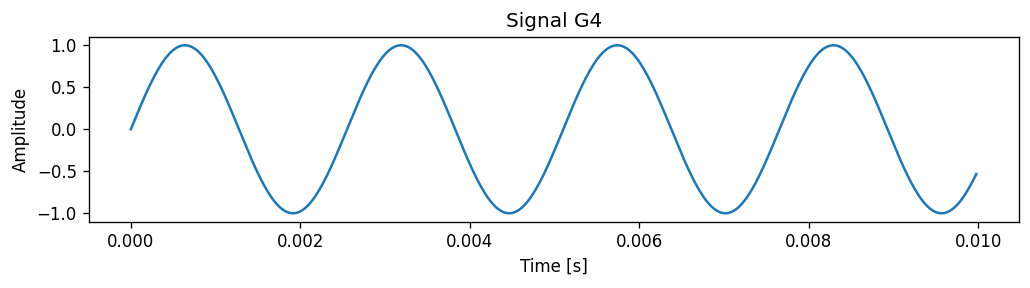

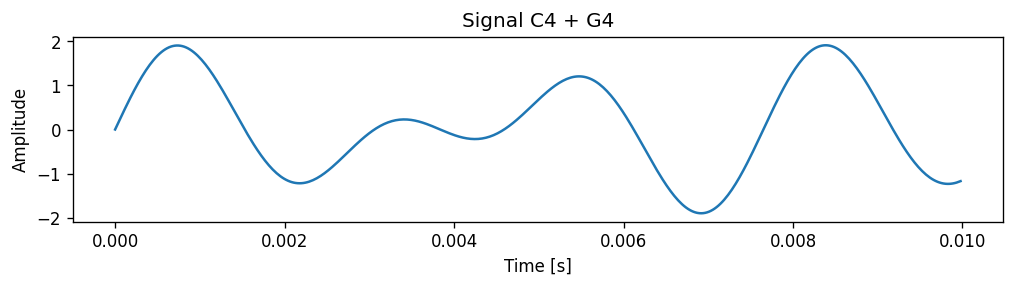

In [8]:
def plot_wave(
    time: np.ndarray,
    signal: np.ndarray,
    sampling_rate: float,
    title: str,
    plot_duration: float = 0.01,
) -> None:
    plt.figure(figsize=(10, 2), dpi=120)
    plt.plot(time[: int(plot_duration * sampling_rate)], signal[: int(plot_duration * sampling_rate)])
    plt.title(title)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()


plot_wave(time, signal_c, sampling_rate, "Signal C4")
plot_wave(time, signal_g, sampling_rate, "Signal G4")
plot_wave(time, signal, sampling_rate, "Signal C4 + G4")

Text(0, 0.5, 'Magnitude')

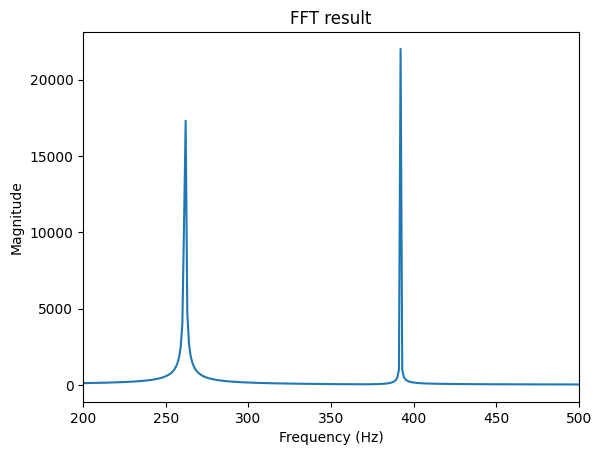

In [9]:
plt.plot(frequencies[: len(frequencies) // 2], fft_magnitude[: len(frequencies) // 2])
plt.xlim(200, 500)
plt.title("FFT result")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

In [10]:
# 音声を読み込み、モノラル化する
audio = AudioSegment.from_mp3("../data/馬の鳴き声1.mp3")
audio = audio.set_channels(1)  # モノラル化

# サンプルデータを取得し、float32に変換して正規化する
samples = np.array(audio.get_array_of_samples()).astype(np.float32)
samples /= np.iinfo(np.int16).max  # int16 の最大値で正規化

# 音声を再生
Audio(samples, rate=audio.frame_rate)

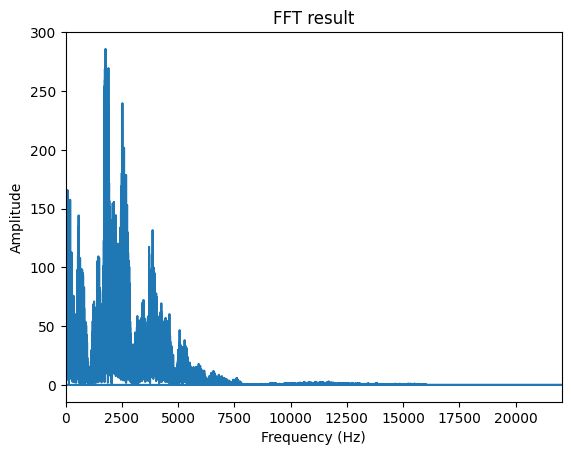

In [11]:
# フーリエ変換を行う
yf = np.fft.fft(samples)
xf = np.fft.fftfreq(len(samples), 1 / audio.frame_rate)

# フーリエ変換の結果をプロット
plt.plot(xf, np.abs(yf))
plt.title("FFT result")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, audio.frame_rate / 2)  # 正の周波数のみ表示
plt.show()